In [1]:
import numpy as np
import pickle
import copy
import pandas as pd
from importlib import reload


import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)
import matplotlib.image as mpimg
import matplotlib.lines as mlines

from sys import path
path.append('./../')
import src as pnp

Helmholtz schrieb zum Durchmesser der Schicht: „Kohlrausch’s Untersuchungen über die Capicität von Platinflächen bei der Electrolyse des Wassers ergeben den mittlern Abstand solcher Schichten gleich dem 2 475 000sten Theil eines Millimeters, wenn man die Polarisation auf beide Platten gleichmässig vertheilt annimmt“. Dies ist ein Abstand d von 0,40 nm. Das stimmt recht gut mit typischen Ionenradien überein, z. B. 0,17 nm für Chlorid, 0,18 nm für Bromid. Der effektive Durchmesser des Sulfations wird mit 0,40 nm angegeben, der des hydratisierten Natriumions Na+ mit 0,45 nm.[6]

Die Radien der meisten einfachen Ionen liegen im Bereich von 0,1 nm bis 1 nm, selbst dann, wenn sie hydratisiert sind.[6] Damit erwartet man auch, dass der Abstand zwischen Elektrode und Helmholtzebene im Bereich von 0,1 nm bis 1 nm liegt. Elektrochemische Spannungen können wegen der Zersetzungsspannung des jeweiligen Elektrolyts, die für Wasser 1,23 V beträgt, wenige Volt nicht überschreiten. Mit einer Spannung von 0,1 V bis 1 V ergeben sich deswegen elektrische Feldstärken im Bereich von 108 bis 1010 V/m. Diese Werte liegen oberhalb der Durchschlagsfestigkeit vieler Materialien, z. B. beträgt die von Glas nur 107 V/m, die von Wasser 7 107 V/m. Das bedeutet, dass aus makroskopischen Experimenten erhaltene Werte der Durchschlagfestigkeit auf atomarer Skala nicht ohne weiteres angewendet werden können. Die hier auftretenden Spannungen sind aufgrund der kleinen Abstände klein. 
(https://de.wikipedia.org/wiki/Helmholtzschicht, Jul., 18 2022)

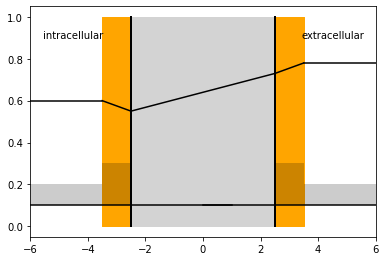

In [41]:
def helmholtz_model_potential(fig, pos):
    
    ax = fig.add_axes(pos)
    ymin, ymax = 0., 1.
    xmin, xmax = -6., 6.
    
    # membrane
    mhd = 2.5 # half diameter of cell membrane
    ax.fill_between([-mhd, mhd],[ymin, ymin],[ymax, ymax], color='lightgray',) 
    
    
    # helmholtzdouble layers
    hd = 1.
    # intracellular excess charge
    ax.fill_between([-mhd-hd, -mhd],[ymin, ymin],[ymax, ymax], color='orange',) 
    
    # extracellular excess charge
    ax.fill_between([mhd, mhd+hd],[ymin, ymin],[ymax, ymax], color='orange',) 
    
    # intracellular membrane charge
    ax.plot([-mhd, -mhd], [ymin, ymax], color='k', lw=2.)
    
    # exctracellular membrane charge
    ax.plot([mhd, mhd], [ymin, ymax], color='k', lw=2.)
    
    # potential
    ax.plot([xmin,-mhd-hd],[0.6, 0.6], c='k')
    ax.plot([-mhd-hd,-mhd],[0.6, 0.55], c='k')
    ax.plot([-mhd,mhd],[0.55, 0.73], c='k')
    ax.plot([mhd,mhd+hd],[0.73, 0.78], c='k')
    ax.plot([mhd+hd,xmax],[0.78, 0.78], c='k')#
    
    ax.fill_between([xmin,-mhd-hd],[0.1, 0.1],[0.2, 0.2], facecolor='k', alpha=0.2)
    ax.fill_between([-mhd-hd,-mhd],[0.1, 0.1],[0.3, 0.3], facecolor='k', alpha=0.2)
    ax.plot([xmin,xmax],[0.1, 0.1],[0.1, 0.1], c='k')
    ax.fill_between([mhd,mhd+hd],[0.1, 0.1],[0.3, 0.3], facecolor='k', alpha=0.2)
    ax.fill_between([mhd+hd,xmax],[0.1, 0.1],[0.2, 0.2], facecolor='k', alpha=0.2)
    
    ax.set_xlim((xmin, xmax))
    ax.text( -4.5, 0.9,'intracellular', ha='center')
    ax.text( 4.5, 0.9,'extracellular', ha='center', )


fig = plt.figure()
pos1 = [0.1, 0.1, 0.8, 0.8]
helmholtz_model_potential(fig, pos1)
plt.show()
    